In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
from numba import jit
from helper import get_extention_tag, display_images
from modules.grouping import divideIntoGroups

In [2]:
dir = "/mnt/c/Users/hiran/Documents/Research/"
filenames = [f for f in os.listdir(dir) if get_extention_tag(f) == 'tif']
paths = [dir + f for f in filenames]
source_images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in paths]

In [3]:
sum_images = np.zeros(source_images[0].shape, dtype='float32')
for img in source_images:
    gauss = cv2.GaussianBlur(img, ksize=(5, 5), sigmaX=0, sigmaY=0)
    sum_images += gauss
sum_images -= np.min(sum_images)
lap = cv2.Laplacian(sum_images, -1, ksize=5)

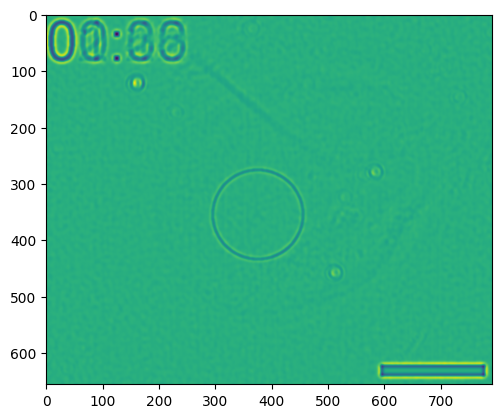

In [4]:
blur = cv2.GaussianBlur(lap, ksize=(7, 7), sigmaX=0, sigmaY=0)
plt.imshow(blur)

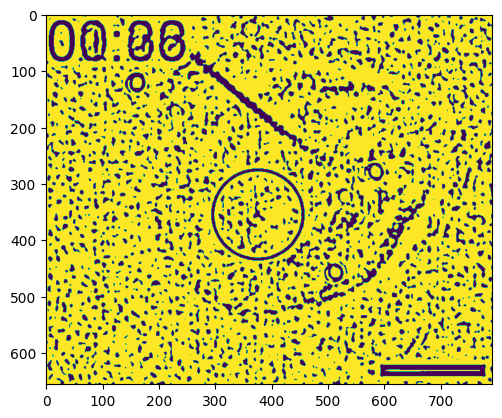

In [5]:
binary = np.ones(blur.shape, dtype=int)
binary[blur < -1000] = 0
plt.imshow(binary)

In [7]:
sizes, grouped = divideIntoGroups(binary, ksize=5)

{17: [(219, 19), (220, 19), (221, 19), (222, 19), (223, 19), (224, 19), (225, 19), (216, 20), (217, 20), (218, 20), (219, 20), (220, 20), (221, 20), (222, 20), (223, 20), (224, 20), (225, 20), (226, 20), (227, 20), (228, 20), (215, 21), (216, 21), (217, 21), (218, 21), (219, 21), (220, 21), (221, 21), (222, 21), (223, 21), (224, 21), (225, 21), (226, 21), (227, 21), (228, 21), (229, 21), (230, 21), (231, 21), (214, 22), (215, 22), (216, 22), (217, 22), (218, 22), (219, 22), (220, 22), (221, 22), (222, 22), (223, 22), (224, 22), (225, 22), (226, 22), (227, 22), (228, 22), (229, 22), (230, 22), (231, 22), (232, 22), (213, 23), (214, 23), (215, 23), (216, 23), (217, 23), (218, 23), (219, 23), (220, 23), (221, 23), (222, 23), (223, 23), (224, 23), (225, 23), (226, 23), (227, 23), (228, 23), (229, 23), (230, 23), (231, 23), (232, 23), (233, 23), (212, 24), (213, 24), (214, 24), (215, 24), (216, 24), (217, 24), (218, 24), (219, 24), (220, 24), (221, 24), (222, 24), (223, 24), (224, 24), (225

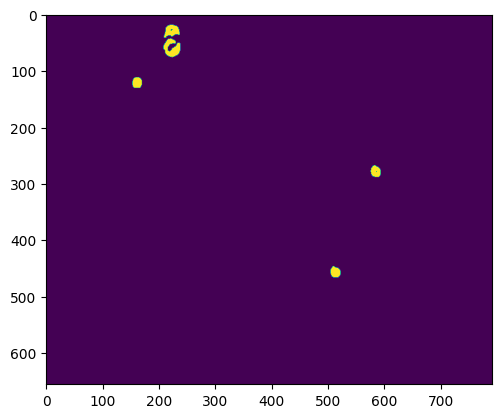

In [21]:
candidates = [group_id for group_id in range(len(sizes)) if sizes[group_id] >= 50 and sizes[group_id] < 1000]
points = {}
for gi in candidates:
    points[gi] = []
for y in range(0, grouped.shape[0]):
    for x in range(0, grouped.shape[1]):
        group_id = int(grouped[y, x])
        if group_id in candidates:
            points[group_id].append((x, y))

print(points)

dusts = []
for gi in candidates:
    xs = np.array([p[0] for p in points[gi]])
    ys = np.array([p[1] for p in points[gi]])
    cx = np.mean(xs)
    cy = np.mean(ys)
    d = np.array([np.sqrt((xs[i] - cx)**2 + (ys[i] - cy)**2) for i in range(len(xs))])
    s = np.std(d)
    cov = np.cov(np.array([xs, ys]))
    if abs(cov[0, 0] / cov[1, 1] - 1) < 2:
        dusts.append(gi)
    # print({
    #     'id': gi,
    #     'cx': cx,
    #     'cy': cy,
    #     # 'd': d,
    #     's': s,
    #     'cov': cov,
    #     # 'cor': cor
    # })

mask_dust = np.zeros(grouped.shape, dtype='uint8')
for y in range(0, grouped.shape[0]):
    for x in range(0, grouped.shape[1]):
        group_id = int(grouped[y, x])
        if group_id in dusts:
            mask_dust[y, x] = 1

plt.imshow(mask_dust)

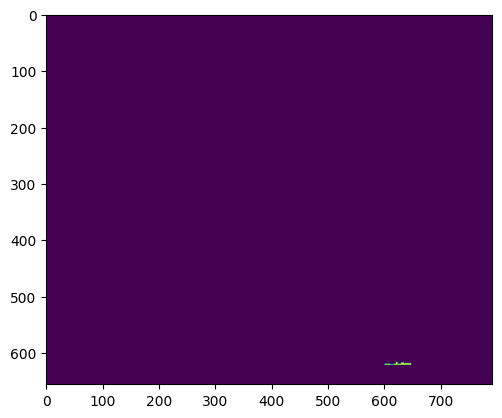

In [18]:
id = 196
tmp = np.zeros(grouped.shape)
tmp[grouped == id] = 1
plt.imshow(tmp)